In [1]:
!pip install pandas
!pip install openpyxl
import pandas as pd
import seaborn as sns



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
datasource = "data/2023-yili-yangin-mudahale-istatistigi.xlsx"
df = pd.read_excel(datasource)
df.head(5) #i used this to see if i update data succesfully or not



,TARIH,YANGIN_TURU,YANGIN_SEBEBİ,YANGIN_SONUCU,YAPI_SEKLI,ERKEK_VEFAT,KADIN_VEFAT,ITFAIYECI_VEFAT,ERKEK_YARALI,KADIN_YARALI,...,KUMES_HAYVANI_VEFAT,EVCIL_HAYVAN_VEFAT,DIGER HAYVAN,VARIS_SURESI (DAK.),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m³),KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG),EKIPLERİN_CIKIS_SAATI,ILCE,ADRES_BOLGESI
0,2023-01-01,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,4,0.0,1.0,0.0,00:18,KARABAĞLAR,KENT MERKEZİ
1,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,3,0.0,0.5,0.0,01:38,KONAK,KENT MERKEZİ
2,2023-01-01,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,2,0.0,0.0,0.0,01:50,KONAK,KENT MERKEZİ
3,2023-01-01,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,0,0,0,4,0.0,2.0,0.0,02:02,BORNOVA,KENT MERKEZİ
4,2023-01-01,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,0,0,0,6,0.0,0.4,0.0,02:24,URLA,KENT MERKEZİ


In [3]:
#DATA PROFILING
#Checking the general structure of dataset:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   TARIH                                     12986 non-null  datetime64[ns]
 1   YANGIN_TURU                               12986 non-null  object        
 2   YANGIN_SEBEBİ                             12986 non-null  object        
 3   YANGIN_SONUCU                             12986 non-null  object        
 4   YAPI_SEKLI                                3116 non-null   object        
 5   ERKEK_VEFAT                               12986 non-null  int64         
 6   KADIN_VEFAT                               12986 non-null  int64         
 7   ITFAIYECI_VEFAT                           12986 non-null  int64         
 8   ERKEK_YARALI                              12986 non-null  int64         
 9   KADIN_YARALI                

In [4]:
#it is seen that there are 12986 entries with 4 types:date,object,integer and float

In [5]:
# we can check how many null values we have for each attribute
df.isnull().sum()

TARIH                                          0
YANGIN_TURU                                    0
YANGIN_SEBEBİ                                  0
YANGIN_SONUCU                                  0
YAPI_SEKLI                                  9870
ERKEK_VEFAT                                    0
KADIN_VEFAT                                    0
ITFAIYECI_VEFAT                                0
ERKEK_YARALI                                   0
KADIN_YARALI                                   0
ITFAIYECI_YARALI                               0
BUYUK_BAS_VEFAT                                0
KUCUK_BAS_VEFAT                                0
KUMES_HAYVANI_VEFAT                            0
EVCIL_HAYVAN_VEFAT                             0
DIGER HAYVAN                                   0
VARIS_SURESI (DAK.)                           11
KULLANILAN_KOPUK_MIKTARI (KG)                  0
KULLANILAN_SU_MIKTARI (m³)                     3
KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)       0
EKIPLERİN_CIKIS_SAAT

In [6]:
# we see there are 3 null values for "KULLANILAN_SU_MIKTARI (m³)"

In [7]:
df.describe()

,TARIH,ERKEK_VEFAT,KADIN_VEFAT,ITFAIYECI_VEFAT,ERKEK_YARALI,KADIN_YARALI,ITFAIYECI_YARALI,BUYUK_BAS_VEFAT,KUCUK_BAS_VEFAT,KUMES_HAYVANI_VEFAT,EVCIL_HAYVAN_VEFAT,DIGER HAYVAN,KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m³),KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)
count,12986,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12983.000000,12986.000000
mean,2023-07-13 19:08:21.771138304,0.001309,0.000539,0.000077,0.012013,0.006700,0.001617,0.000231,0.004697,2.129755,0.001925,0.024565,5.549373,4.044010,0.281365
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-05-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,2023-07-23 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2023-09-20 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,2023-12-31 00:00:00,2.000000,1.000000,1.000000,7.000000,6.000000,3.000000,2.000000,40.000000,17500.000000,13.000000,124.000000,15000.000000,1000.000000,250.000000
std,NaN,0.038230,0.023212,0.008775,0.154043,0.111149,0.053356,0.019622,0.359771,176.867171,0.120630,1.267258,158.194392,26.634735,2.967351


In [8]:
# filter categorical variables
categorical_var = df.select_dtypes(include=['object']).columns
for col in categorical_var:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- YANGIN_TURU ---
YANGIN_TURU
OT                                  3777
ÇÖP                                 3095
BİNA                                2092
ARAÇ                                1014
İŞYERİ                               614
AĞAÇ                                 315
KARGILIK                             207
ORMAN/FİDANLIK                       194
TRAFO                                161
BAĞ/BAHÇE                            153
KABLO/DİREK-ELEKT/TEL VB             141
FABRİKA/ATÖLYE/İMALATHANE            137
BARAKA/KULÜBE/YAŞAM KONTEYNERİ       124
EKİN/SAMAN                           102
MAKİLİK/ÇALI                          82
LASTİK                                75
ZEYTİNLİK                             69
HURDA-AÇIK ALANDA                     68
ANIZ                                  68
SİGORTA PANO-BİNADAN BAĞIMSIZ         59
ODUNLUK/KÖMÜRLÜK                      55
DİĞER                                 54
MOTOSİKLET                            44
AÇIK ALAN DEPO           

In [9]:
#As we seen before, there a missing values 3 null values for "KULLANILAN_SU_MIKTARI (m³)
#Before analyzing outliers, it is better to fill these missing ones, to do that i get the mean of this feature and use them for these missing values
print("Before filling missing values:")
print(df["KULLANILAN_SU_MIKTARI (m³)"].isnull().sum(), "missing values.")
mean_of_water=df["KULLANILAN_SU_MIKTARI (m³)"].mean()
print("The mean of water=",mean_of_water) #i want to see if i wrote the code correctly.
#To fill missing values:
df["KULLANILAN_SU_MIKTARI (m³)"]=df["KULLANILAN_SU_MIKTARI (m³)"].fillna(mean_of_water)
print("After filling missing values:")
print(df["KULLANILAN_SU_MIKTARI (m³)"].isnull().sum(),"missing values.")

Before filling missing values:
3 missing values.
The mean of water= 4.0440098590464455
After filling missing values:
0 missing values.


In [10]:
#As we can see from the result, missing values are filled with the mean.

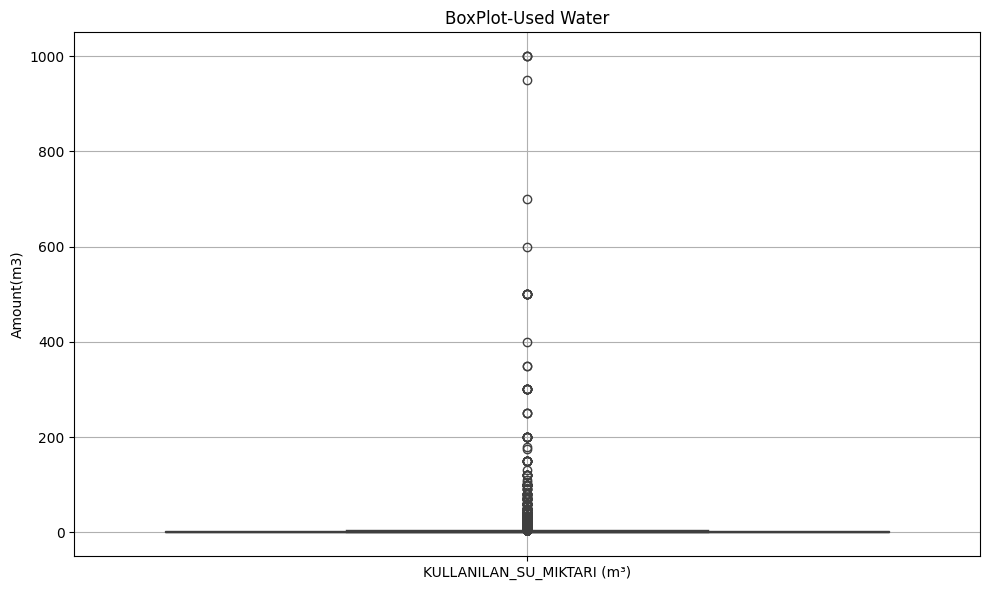

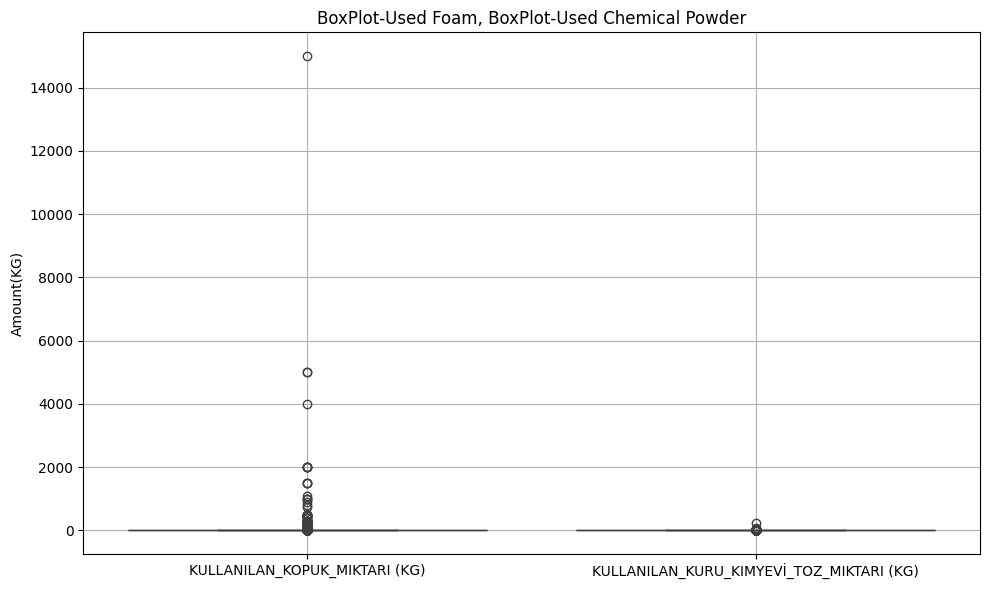

In [11]:
#To detect outliers I used boxplot. Since there are different metrics like kg and m3, I created 2 different figures.

import matplotlib.pyplot as plt
#Boxplot for used water
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['KULLANILAN_SU_MIKTARI (m³)']])
plt.title("BoxPlot-Used Water")
plt.ylabel("Amount(m3)")
plt.grid(True)
plt.tight_layout()
plt.show()
#Box plot for used foam and chemical powder
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['KULLANILAN_KOPUK_MIKTARI (KG)', 'KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)']])
plt.title("BoxPlot-Used Foam, BoxPlot-Used Chemical Powder")
plt.ylabel("Amount(KG)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
#We that the majority of water usage values were concentrated below 50 m³ but there are significant outliers reaching up to 1000 m³ were detected. 
#Similarly, while the majority of foam and chemical powder usages were low, there were extreme outlier values, especially in foam usage. 
#These outliers suggest that while most fire interventions required moderate material usage, a small number of incidents required exceptionally large amounts of extinguishing agents.
#To improve the performance of the model that i'll create, i remove these outliers by using IQR approach
#For used WATER:
q1_water=df['KULLANILAN_SU_MIKTARI (m³)'].quantile(0.25)
q3_water=df['KULLANILAN_SU_MIKTARI (m³)'].quantile(0.75)
IQR_water=q3_water-q1_water
print("IQR_water",IQR_water)
lower_bound_water=q1_water-1.5*IQR_water
upper_bound_water=q3_water+1.5*IQR_water

#For used FOAM:
q1_foam=df['KULLANILAN_KOPUK_MIKTARI (KG)'].quantile(0.25)
q3_foam=df['KULLANILAN_KOPUK_MIKTARI (KG)'].quantile(0.75)
IQR_foam=q3_foam-q1_foam
print("IQR_foam",IQR_foam)
lower_bound_foam=q1_foam-1.5*IQR_foam
upper_bound_foam=q3_foam+1.5*IQR_foam

#For used CHEMICAL POWDER:
q1_chem_powder=df['KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)'].quantile(0.25)
q3_chem_powder=df['KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)'].quantile(0.75)
IQR_chem_powder=q3_chem_powder-q1_chem_powder
print("IQR_chem_powder",IQR_chem_powder)
lower_bound_chem_powder=q1_chem_powder-1.5*IQR_chem_powder
upper_bound_chem_powder=q3_chem_powder+1.5*IQR_chem_powder


IQR_water 1.8
IQR_foam 0.0
IQR_chem_powder 0.0


In [13]:
#We see that IQR values are 0 for foam and chemical powder but on the other hand we see that there are outliers for foam from boxplot.
#So, IQR method did not work well for this feature. Instead of that, I decided to apply percintile method to remove outliers
#For chemical powder, i see that there is no need to cleaning, so i did not do this procedure for this feature.
upper_limit_foam = df['KULLANILAN_KOPUK_MIKTARI (KG)'].quantile(0.995)
#Cleaned dataframe
df_cleaned = df[(df['KULLANILAN_SU_MIKTARI (m³)']>=lower_bound_water)&(df['KULLANILAN_SU_MIKTARI (m³)'] <= upper_bound_water)&(df['KULLANILAN_KOPUK_MIKTARI (KG)']<=upper_limit_foam)]


In [14]:
#Creating a function to create a new columsn according to fire results
def classify_fire_result(x):
    if x=="BAŞLANGIÇTA SÖNDÜRÜLEN" or x=="KISMEN YANARAK KURTARILAN":
        return 1
    elif x=="TAMAMEN YANAN":
        return 0
    else:
        return None
#applying this funtion to the dataframe
df_cleaned['YANGIN_SONUCU_2'] =df_cleaned['YANGIN_SONUCU'].apply(classify_fire_result)
print(df_cleaned[['YANGIN_SONUCU', 'YANGIN_SONUCU_2']].head(100))


                 YANGIN_SONUCU  YANGIN_SONUCU_2
0       BAŞLANGIÇTA SÖNDÜRÜLEN                1
1       BAŞLANGIÇTA SÖNDÜRÜLEN                1
2       BAŞLANGIÇTA SÖNDÜRÜLEN                1
3    KISMEN YANARAK KURTARILAN                1
4       BAŞLANGIÇTA SÖNDÜRÜLEN                1
..                         ...              ...
99      BAŞLANGIÇTA SÖNDÜRÜLEN                1
100     BAŞLANGIÇTA SÖNDÜRÜLEN                1
101              TAMAMEN YANAN                0
102     BAŞLANGIÇTA SÖNDÜRÜLEN                1
103     BAŞLANGIÇTA SÖNDÜRÜLEN                1

[100 rows x 2 columns]


C:\Users\Arda\AppData\Local\Temp\ipykernel_10344\793564325.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YANGIN_SONUCU_2'] =df_cleaned['YANGIN_SONUCU'].apply(classify_fire_result)


In [15]:
#We can see that fire results are become binary variable in a new column.

In [16]:
#Creating a function to create a new column for material type
def material_detection(y):
    materials=[]
    if y['KULLANILAN_SU_MIKTARI (m³)'] > 0:
        materials.append('Water')
    if y['KULLANILAN_KOPUK_MIKTARI (KG)'] > 0:
        materials.append('Foam')
    if y['KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)'] > 0:
        materials.append('Chemical Powder')

    if materials:
        return '+'.join(materials)
    else:
        return 'None'
#To see summary of material usage, I wrote counter then print it
df_cleaned['Used_Material_Type'] = df_cleaned.apply(material_detection, axis=1)
material_type_counter=df_cleaned['Used_Material_Type'].value_counts()
print(material_type_counter)

Used_Material_Type
Water                         9401
None                          1556
Chemical Powder                273
Water+Foam                     130
Water+Chemical Powder           82
Foam                            15
Water+Foam+Chemical Powder       3
Foam+Chemical Powder             1
Name: count, dtype: int64


C:\Users\Arda\AppData\Local\Temp\ipykernel_10344\2636312057.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Used_Material_Type'] = df_cleaned.apply(material_detection, axis=1)


In [17]:
#As we can see, the used water unit is m3 but others are kg. To scale them, we need to conver used water unit to kg.
#To do that, I assumed 1m3=1000kg
df_cleaned['KULLANILAN_SU_MIKTARI (KG)']=df_cleaned['KULLANILAN_SU_MIKTARI (m³)']*1000
print(df_cleaned[['KULLANILAN_SU_MIKTARI (m³)','KULLANILAN_SU_MIKTARI (KG)']].head())

   KULLANILAN_SU_MIKTARI (m³)  KULLANILAN_SU_MIKTARI (KG)
0                         1.0                      1000.0
1                         0.5                       500.0
2                         0.0                         0.0
3                         2.0                      2000.0
4                         0.4                       400.0


C:\Users\Arda\AppData\Local\Temp\ipykernel_10344\2428963850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KULLANILAN_SU_MIKTARI (KG)']=df_cleaned['KULLANILAN_SU_MIKTARI (m³)']*1000


In [18]:
df_cleaned.head(5)
#For a statistical test, i try to find that is there any relationship between used material type and fire result
#To do that, i used chi-square test because there are 2 categorical variables for my test
#Null Hypothesis(H0):There is no relationship between the used material and fire result
#Alternative Hypothesis(H1):There is a significant association between used material and fire result
#I selected alpha value as 0.05, so if the p-value less than alpha, we will reject null hypothesis(H0)

from scipy.stats import chi2_contingency
#i create contingecy table between these two variable so that i'll se the total extinguish and not extinguish outcomes for each material
contingency_table=pd.crosstab(df_cleaned['Used_Material_Type'],df_cleaned['YANGIN_SONUCU_2'])
print('Contingency Table:')
print(contingency_table)

#applying chi-square test:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Contingency Table:
YANGIN_SONUCU_2               0     1
Used_Material_Type                   
Chemical Powder              12   261
Foam                          1    14
Foam+Chemical Powder          0     1
None                         19  1537
Water                       179  9222
Water+Chemical Powder         5    77
Water+Foam                   24   106
Water+Foam+Chemical Powder    2     1
Chi-Square Test Statistic: 251.26849462854113
p-value: 1.4879635318585305e-50
Degrees of Freedom: 7
Expected Frequencies:
YANGIN_SONUCU_2                      0            1
Used_Material_Type                                 
Chemical Powder               5.764418   267.235582
Foam                          0.316726    14.683274
Foam+Chemical Powder          0.021115     0.978885
None                         32.855074  1523.144926
Water                       198.502923  9202.497077
Water+Chemical Powder         1.731437    80.268563
Water+Foam                    2.744961   127.255039
Water+Foam+

In [19]:
#From contingecy table, we can see that there is high success achived with water but with a combination of water with other materials, there are low success which means the result is not extinguish.
#From chi-square test:
#p-value=1.4879635318585305e-50 so it is less than 0.05 so we reject to null hypothesis
#As a result, we can say that there is a relationship between used material and fire result.
df_cleaned.head()

,TARIH,YANGIN_TURU,YANGIN_SEBEBİ,YANGIN_SONUCU,YAPI_SEKLI,ERKEK_VEFAT,KADIN_VEFAT,ITFAIYECI_VEFAT,ERKEK_YARALI,KADIN_YARALI,...,VARIS_SURESI (DAK.),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m³),KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG),EKIPLERİN_CIKIS_SAATI,ILCE,ADRES_BOLGESI,YANGIN_SONUCU_2,Used_Material_Type,KULLANILAN_SU_MIKTARI (KG)
0,2023-01-01,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,4,0.0,1.0,0.0,00:18,KARABAĞLAR,KENT MERKEZİ,1,Water,1000.0
1,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,3,0.0,0.5,0.0,01:38,KONAK,KENT MERKEZİ,1,Water,500.0
2,2023-01-01,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,2,0.0,0.0,0.0,01:50,KONAK,KENT MERKEZİ,1,None,0.0
3,2023-01-01,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,4,0.0,2.0,0.0,02:02,BORNOVA,KENT MERKEZİ,1,Water,2000.0
4,2023-01-01,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,6,0.0,0.4,0.0,02:24,URLA,KENT MERKEZİ,1,Water,400.0


In [20]:
#creating a machine learning model with logistic regression
from sklearn.model_selection import train_test_split
x=df_cleaned[['KULLANILAN_SU_MIKTARI (KG)','KULLANILAN_KOPUK_MIKTARI (KG)','KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)']]
y=df_cleaned['YANGIN_SONUCU_2']
#I used random state as my school number when splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2740926)
#To see if i split data correctly
print(x_train.shape)
print(y_train.shape)

(9168, 3)
(9168,)


In [21]:
#As a result, we can see that there are 9168 data for training set with 3 columns which are KULLANILAN_SU_MIKTARI (KG),KULLANILAN_KOPUK_MIKTARI (KG) and KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)
#Also there are 9168 y values which are the results of these training set as 0 or 1


In [22]:
#Training the model with training set
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=100)
log_model.fit(x_train,y_train)
#Making a prediction with test set with trained model
y_pred=log_model.predict(x_test)
#Evaluation of metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
log_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",log_accuracy)
log_precision=precision_score(y_test,y_pred)
print("Precision:",log_precision)
log_recall=recall_score(y_test,y_pred)
print("Recall:",log_recall)
log_f1_score=f1_score(y_test,y_pred)
print("F1 Score:",log_f1_score)


Accuracy: 0.9790667248146533
Precision: 0.9790575916230366
Recall: 1.0
F1 Score: 0.9894179894179894


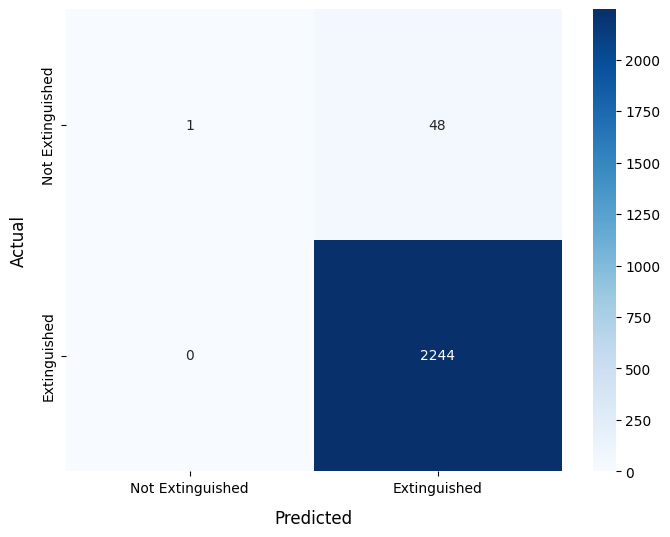

<Figure size 600x400 with 0 Axes>

In [23]:
#Visualizing confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat,xticklabels=['Not Extinguished', 'Extinguished'],yticklabels=['Not Extinguished', 'Extinguished'],cmap='Blues',annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted', fontsize=12, labelpad=10)
ax.set_ylabel('Actual', fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

In [24]:
#to optimize logistic regression, I used grid search, hyperparameters are regularization strenght (C), and optimization solver
#I considered F1 score because for imbalanced datasets, F1 score is more fair.
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.01,0.1,1,10], 'solver':['liblinear','lbfgs'],'penalty':['l2']}
log_reg=LogisticRegression(max_iter=1000)
#to increase performance, i used n_jobs=-1
grid_search=GridSearchCV(estimator=log_reg,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1)
grid_search.fit(x_train,y_train)
print("Best Parameters:",grid_search.best_params_)
print("Best F1 Score:",grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.9893065869679386


In [25]:
#after finding best parameters, i used them for test set
from sklearn.metrics import classification_report
best_model=grid_search.best_estimator_
y_pred_tuned=best_model.predict(x_test)
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        49
           1       0.98      1.00      0.99      2244

    accuracy                           0.98      2293
   macro avg       0.99      0.51      0.51      2293
weighted avg       0.98      0.98      0.97      2293



In [26]:
#to see which variables has a higher effect on the fire result, i used best_model_coef
#selecting feature names as KULLANILAN_SU_MIKTARI (KG),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)
feature_names=x_train.columns 
coefficients=best_model.coef_[0]

coef_df=pd.DataFrame({'Feature':feature_names,'Coefficient':coefficients})
#taking the absolute values of these coefficients:
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
#sorting them
coef_df.sort_values(by='Absolute Coefficient',ascending=False,inplace=True)
print(coef_df)

                                    Feature  Coefficient  Absolute Coefficient
2  KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG)    -0.058028              0.058028
1             KULLANILAN_KOPUK_MIKTARI (KG)    -0.033563              0.033563
0                KULLANILAN_SU_MIKTARI (KG)    -0.000436              0.000436


In [27]:
#I compared my model with a baselien model to show whether the difference is statistically significant
from sklearn.dummy import DummyClassifier
#creating a dummy model which always predicts majority class
dummy=DummyClassifier(strategy="most_frequent")
dummy.fit(x_train,y_train)
y_dummy_pred=dummy.predict(x_test)
baseline_accuracy=accuracy_score(y_test,y_dummy_pred)
baseline_f1_score=f1_score(y_test,y_dummy_pred)
baseline_recall=recall_score(y_test,y_dummy_pred)
print("Baseline accuracy:",baseline_accuracy)
print("Baseline F1 Score:",baseline_f1_score)
print("Recall:",baseline_recall)
print("Confusion matrix for dummy:\n",confusion_matrix(y_test, y_dummy_pred))


Baseline accuracy: 0.9786306149149586
Baseline F1 Score: 0.989199911836015
Recall: 1.0
Confusion matrix for dummy:
 [[   0   49]
 [   0 2244]]


In [28]:
#to compare logistic regression and baseline:
comparison_df = pd.DataFrame({'Metric': ['Accuracy', 'F1 Score', 'Recall'],'Logistic Regression': [log_accuracy, log_f1_score, log_recall],'Baseline Model': [baseline_accuracy, baseline_f1_score, baseline_recall]
})

print(comparison_df)

     Metric  Logistic Regression  Baseline Model
0  Accuracy             0.979067        0.978631
1  F1 Score             0.989418        0.989200
2    Recall             1.000000        1.000000


In [29]:
#When we look at the result, it is seen that values are very close to each other. It is so normal to receive recall=1 in baseline model because recall is calculating as TP/(TP+FN) and there are no FN for baseline model.
#Since it is similar for logistic regression model, we prove that this data set is very imbalanced, most of the result are extinguished.
#We also know that baseline_model can not be used for real word scenarios because there is no "not extinguish"